In [1]:
from automatic_differentiation import Variable
import automatic_differentiation as ad
import graphviz
import numpy as np

In [2]:
x = Variable('x')
x

Variable(name='x')

In [3]:
f = x + 1
f

Node(name='x + 1', operation='+', operands=('x', 1))

In [4]:
f.gradient_fn(1)

((Variable(name='x'), array(1, dtype=object)),
 (Constant(name='1', value=1.0), array(1.)))

In [5]:
f.operands

(Variable(name='x'), Constant(name='1', value=1.0))

digraph {
  fontsize=15
  labelloc="t"
  label="Computational graph"
  var_10e894b50 [style=filled, shape=square, fillcolor=lavenderblush3, label="+"];
  var_10e894b50 -> var_10e894a00;
  var_10e894b50 -> var_10e894a90;
  var_10e894a00 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="x"];
  var_10e894a90 [style=filled, shape=circle, fillcolor=ivory3, label="1"];
}


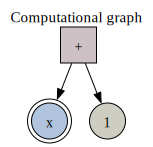

In [6]:
print(f.graph)
graphviz.Source(f.graph)

In [7]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
f = ((x ** 2 + 1) - 1 / y) ** 3 + ad.log(z)
f

Node(name='(x ** 2 + 1 - 1 / y) ** 3 + log(z)', operation='+', operands=('(x ** 2 + 1 - 1 / y) ** 3', 'log(z)'))

digraph {
  fontsize=15
  labelloc="t"
  label="Computational graph"
  var_10e8bed30 [style=filled, shape=square, fillcolor=lavenderblush3, label="+"];
  var_10e8bed30 -> var_10e8beb20;
  var_10e8bed30 -> var_10e8bec10;
  var_10e8beb20 [style=filled, shape=square, fillcolor=lavenderblush3, label="**"];
  var_10e8beb20 -> var_10e8be730;
  var_10e8beb20 -> var_10e8bea90;
  var_10e8be730 [style=filled, shape=square, fillcolor=lavenderblush3, label="-"];
  var_10e8be730 -> var_10e8be2b0;
  var_10e8be730 -> var_10e8be940;
  var_10e8be2b0 [style=filled, shape=square, fillcolor=lavenderblush3, label="+"];
  var_10e8be2b0 -> var_10e8be400;
  var_10e8be2b0 -> var_10e8be340;
  var_10e8be400 [style=filled, shape=square, fillcolor=lavenderblush3, label="**"];
  var_10e8be400 -> var_10e8ae550;
  var_10e8be400 -> var_10e8be4c0;
  var_10e8ae550 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="x"];
  var_10e8be4c0 [style=filled, shape=circle, fillcolor=ivory3, label="2"];
  var_10e8

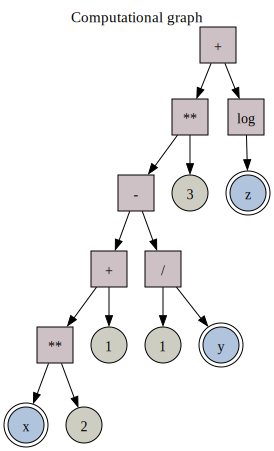

In [8]:
print(f.graph)
graphviz.Source(f.graph)

In [9]:
f.evaluate_at(x=2, y=3, z=4)

103.01592399074954

digraph {
  fontsize=15
  labelloc="t"
  label="Computational graph"
  var_10e8bed30 [style=filled, shape=square, fillcolor=lavenderblush3, label="+"];
  var_10e8bed30 -> var_10e8beb20;
  var_10e8bed30 -> var_10e8bec10;
  var_10e8beb20 [style=filled, shape=square, fillcolor=lavenderblush3, label="**"];
  var_10e8beb20 -> var_10e8be730;
  var_10e8beb20 -> var_10e8bea90;
  var_10e8be730 [style=filled, shape=square, fillcolor=lavenderblush3, label="-"];
  var_10e8be730 -> var_10e8be2b0;
  var_10e8be730 -> var_10e8be940;
  var_10e8be2b0 [style=filled, shape=square, fillcolor=lavenderblush3, label="+"];
  var_10e8be2b0 -> var_10e8be400;
  var_10e8be2b0 -> var_10e8be340;
  var_10e8be400 [style=filled, shape=square, fillcolor=lavenderblush3, label="**"];
  var_10e8be400 -> var_10e8ae550;
  var_10e8be400 -> var_10e8be4c0;
  var_10e8ae550 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="x"];
  var_10e8be4c0 [style=filled, shape=circle, fillcolor=ivory3, label="2"];
  var_10e8

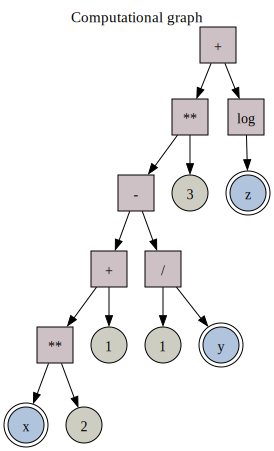

In [10]:
print(f.graph)
graphviz.Source(f.graph)

In [11]:
A = Variable('A')
B = Variable('B')
C = Variable('C')
formula = A @ B + C
print(f"f(A, B) = {formula}")
formula

f(A, B) = A @ B + C


Node(name='A @ B + C', operation='+', operands=('A @ B', 'C'))

In [12]:
A_val = np.diag([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
B_val = np.ones((10, 5))
C_val = np.random.randn(10, 5)

evaluation = formula.evaluate_at(A=A_val, B=B_val, C=C_val)
print(f"f(A, B) = \n{evaluation}")
evaluation

f(A, B) = 
[[ 1.37669584  0.46374228  1.33648953 -0.25631369  0.78162667]
 [ 1.15427177  1.31430477  2.1022658   1.73072643  2.80101321]
 [ 3.89870284  2.38490178  4.56822637  2.9458567   2.54802376]
 [ 2.33149884  3.87586273  2.9783517   4.50629894  3.99544479]
 [ 4.1904371   5.24535991  6.06931472  5.16041469  4.33888539]
 [ 7.00736001  7.16314949  6.78876544  7.65113485  5.80802954]
 [ 8.83381037  7.11352782  5.64365468  6.98626325  7.66489386]
 [ 7.19347119  9.12254898  9.48927844  7.28405681  7.83785674]
 [11.22782177  7.84231134  8.29138255 10.66845774  8.40733376]
 [ 8.80064085  9.4927459  11.38325834  8.30276295  9.44201027]]


array([[ 1.37669584,  0.46374228,  1.33648953, -0.25631369,  0.78162667],
       [ 1.15427177,  1.31430477,  2.1022658 ,  1.73072643,  2.80101321],
       [ 3.89870284,  2.38490178,  4.56822637,  2.9458567 ,  2.54802376],
       [ 2.33149884,  3.87586273,  2.9783517 ,  4.50629894,  3.99544479],
       [ 4.1904371 ,  5.24535991,  6.06931472,  5.16041469,  4.33888539],
       [ 7.00736001,  7.16314949,  6.78876544,  7.65113485,  5.80802954],
       [ 8.83381037,  7.11352782,  5.64365468,  6.98626325,  7.66489386],
       [ 7.19347119,  9.12254898,  9.48927844,  7.28405681,  7.83785674],
       [11.22782177,  7.84231134,  8.29138255, 10.66845774,  8.40733376],
       [ 8.80064085,  9.4927459 , 11.38325834,  8.30276295,  9.44201027]])

In [13]:
grads = formula.grads
print(f"df(A, B)/dA = \n{grads[A]}")
print(f"df(A, B)/dB = \n{grads[B]}")
print(f"df(A, B)/dC = \n{grads[C]}")

df(A, B)/dA = 
[[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]
df(A, B)/dB = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]
df(A, B)/dC = 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [14]:
print(formula.graph)
formula.graph

digraph {
  fontsize=15
  labelloc="t"
  label="Computational graph"
  var_10e8c5430 [style=filled, shape=square, fillcolor=lavenderblush3, label="+"];
  var_10e8c5430 -> var_10e8c5550;
  var_10e8c5430 -> var_10e8c5760;
  var_10e8c5550 [style=filled, shape=square, fillcolor=lavenderblush3, label="@"];
  var_10e8c5550 -> var_10e8c5730;
  var_10e8c5550 -> var_10e8c5100;
  var_10e8c5730 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="A"];
  var_10e8c5100 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="B"];
  var_10e8c5760 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="C"];
}


'digraph {\n  fontsize=15\n  labelloc="t"\n  label="Computational graph"\n  var_10e8c5430 [style=filled, shape=square, fillcolor=lavenderblush3, label="+"];\n  var_10e8c5430 -> var_10e8c5550;\n  var_10e8c5430 -> var_10e8c5760;\n  var_10e8c5550 [style=filled, shape=square, fillcolor=lavenderblush3, label="@"];\n  var_10e8c5550 -> var_10e8c5730;\n  var_10e8c5550 -> var_10e8c5100;\n  var_10e8c5730 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="A"];\n  var_10e8c5100 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="B"];\n  var_10e8c5760 [style=filled, shape=doublecircle, fillcolor=lightsteelblue, label="C"];\n}'

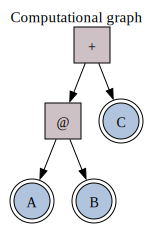

In [15]:
graphviz.Source(formula.graph)

In [16]:
more = formula + np.random.randn(10, 5)
more

Node(name='A @ B + C + ndarray(10, 5)', operation='+', operands=('A @ B + C', ndarray(10, 5)))

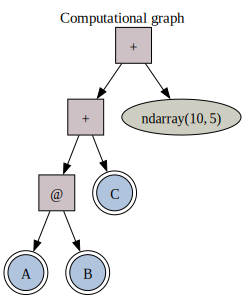

In [17]:
graphviz.Source(more.graph)

In [18]:
test = ad.einsum('ij,jk->ik', A, B)
test

einsum(subscripts='ij,jk->ik', A, B)

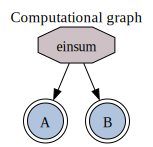

In [19]:
graphviz.Source(test.graph)

In [20]:
A_val = np.diag([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
B_val = np.ones((10, 5))

evaluation = test.evaluate_at(A=A_val, B=B_val)
print(f"f(A, B) = \n{evaluation}")
evaluation

f(A, B) = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]


array([[ 1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.,  7.],
       [ 8.,  8.,  8.,  8.,  8.],
       [ 9.,  9.,  9.,  9.,  9.],
       [10., 10., 10., 10., 10.]])

In [21]:
grads = test.grads
print(f"df(A, B)/dA = \n{grads[A]}")
print(f"df(A, B)/dB = \n{grads[B]}")

df(A, B)/dA = 
[[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]
df(A, B)/dB = 
[[ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]


In [22]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
formula = ad.einsum('ij, kl, mn -> mnij', x, y, z)

x_val = np.array([[1.0, -2.0], [5.0, 3.0]])
y_val = np.array([[3.0, 2.0], [-7.0, 4.0]])
z_val = np.array([[1.0, 0.0], [0.0, -1.0]])

result = formula.evaluate_at(x=x_val, y=y_val, z=z_val)
result

array([[[[  2.,  -4.],
         [ 10.,   6.]],

        [[  0.,   0.],
         [  0.,   0.]]],


       [[[  0.,   0.],
         [  0.,   0.]],

        [[ -2.,   4.],
         [-10.,  -6.]]]])

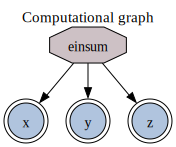

In [23]:
graphviz.Source(formula.graph)

In [24]:
x = Variable('x')
y = Variable('y')
z = Variable('z')
formula = (x ** 2 + y ** 3) * z - ad.einsum('ij, jk -> ik', x, y)
formula

Node(name='(x ** 2 + y ** 3) * z - einsum(subscripts='ij,jk->ik', x, y)', operation='-', operands=('(x ** 2 + y ** 3) * z', 'einsum(subscripts='ij,jk->ik', x, y)'))

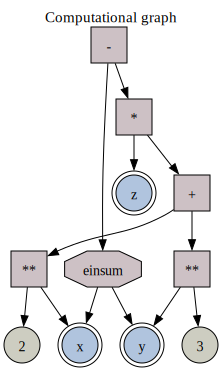

In [25]:
graphviz.Source(formula.graph)